In [126]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.io as pio
%pylab inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.simplefilter(action='ignore')
pio.renderers.default = 'iframe'

Populating the interactive namespace from numpy and matplotlib


In [127]:
# Load Asset Data first
SP = pd.read_csv("..\\Data\\Asset\\SP500.csv",parse_dates=True)
DG = pd.read_csv("..\\Data\\Asset\\DGS3MO.csv",parse_dates=True)
DX = pd.read_csv("..\\Data\\Asset\\DXY.csv",parse_dates=True)
GC = pd.read_csv("..\\Data\\Asset\\GC.csv",parse_dates=True)
RI = pd.read_csv("..\\Data\\Asset\\RI.csv",parse_dates=True)

In [128]:
# Load Macro Data second
GDP = pd.read_csv("..\\Data\\Macro\\GDP.csv",parse_dates=True)
INF = pd.read_csv("..\\Data\\Macro\\inflation.csv",parse_dates=True)
EMP = pd.read_csv("..\\Data\\Macro\\unemployment.csv",parse_dates=True)

In [129]:
pyo.iplot(go.Figure(data=[go.Scatter(x = SP['date'],y = SP['adj_close_SP'],mode = 'lines',name = 'Adjusted Close')],
                    layout=go.Layout(title = 'S&P 500')))

In [130]:
SP.head()

date  adj_close_SP   volume_SP
0  03/01/2000   1455.219971   931800000
1  04/01/2000   1399.420044  1009000000
2  05/01/2000   1402.109985  1085500000
3  06/01/2000   1403.449951  1092300000
4  07/01/2000   1441.469971  1225200000

In [131]:
pyo.iplot(go.Figure(data=[go.Scatter(x = DG['date'],y = DG['adj_close_DG'],mode = 'lines',name = 'markers')],
                    layout=go.Layout(title = '3-Month Treasury Constant Maturity Rate')))

In [132]:
DG.head()

date  adj_close_DG
0  03/01/2000        0.0548
1  04/01/2000        0.0543
2  05/01/2000        0.0544
3  06/01/2000        0.0541
4  07/01/2000        0.0538

In [133]:
pyo.iplot(go.Figure(data=[go.Scatter(x = DX['date'],y = DX['adj_close_DX'],mode = 'lines',name = 'markers')],
                    layout=go.Layout(title = 'U.S. Dollar Index (DXY)')))

In [134]:
DX.head()

date  adj_close_DX  volume_DX
0  03/01/2000    100.220001          0
1  04/01/2000    100.410004          0
2  05/01/2000    100.379997          0
3  06/01/2000    100.650002          0
4  07/01/2000    100.800003          0

In [135]:
pyo.iplot(go.Figure(data=[go.Scatter(x = GC['date'],y = GC['adj_close_GC'],mode = 'lines',name = 'markers')],
                    layout=go.Layout(title = 'GC-gold spot')))

In [136]:
GC.head()

date  adj_close_GC  volume_GC
0  28/02/2000    292.500000          4
1  29/02/2000    292.399994          7
2  01/03/2000    291.500000          0
3  02/03/2000    288.200012        100
4  03/03/2000    288.799988         10

In [137]:
pyo.iplot(go.Figure(data=[go.Scatter(x = RI['date'],y = RI['adj_close_RI'],mode = 'lines',name = 'markers')],
                   layout=go.Layout(title = 'MSCI US REIT INDEX')))

In [138]:
RI.head()

date  adj_close_RI  volume_RI
0  03/01/2000    285.989990          0
1  04/01/2000    283.500000          0
2  05/01/2000    284.369995          0
3  06/01/2000    289.440002          0
4  07/01/2000    295.929993          0

## Calculate Correlation Matrix for daily returns of the assets.

In [139]:
corr = pd.concat([SP.set_index('date'), DG.set_index('date'), DX.set_index('date'),GC.set_index('date'),RI.set_index('date')]\
                   ,axis=1, join='inner').sort_values(by=['date']).corr()

In [140]:
corr.drop(corr.columns[[1,4,6,8]],axis=1,inplace=True)

<Figure size 1080x1080 with 0 Axes>

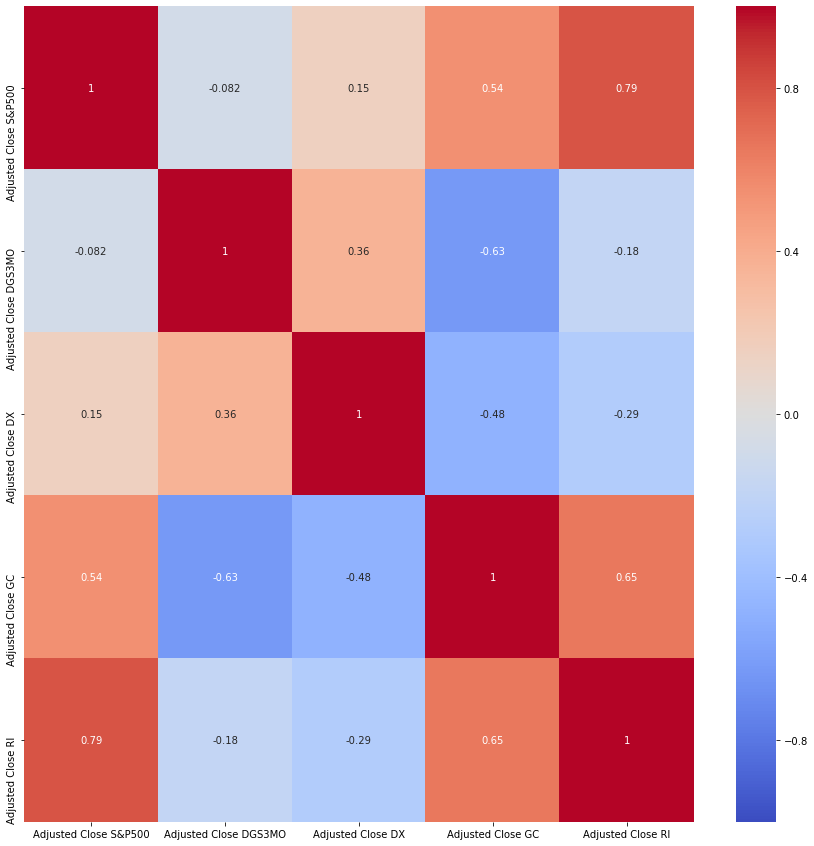

In [141]:
plt.figure(figsize=(15,15))
sns.heatmap(corr.drop(['volume_SP','volume_DX','volume_GC','volume_RI']), annot = True, 
            xticklabels=["Adjusted Close S&P500","Adjusted Close DGS3MO","Adjusted Close DX","Adjusted Close GC","Adjusted Close RI"], 
            yticklabels=["Adjusted Close S&P500","Adjusted Close DGS3MO","Adjusted Close DX","Adjusted Close GC","Adjusted Close RI"],
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### Macro Economic Factors

In [142]:
pyo.iplot(go.Figure(data=[go.Scatter(x = GDP['end_date'],y = GDP['value'],mode = 'lines',name = 'markers')],
                    layout=go.Layout(title = 'Gross Domestic Product-USA')))

In [143]:
GDP.head()

start_date    end_date country indicator    value  \
0  01/01/1947  31/03/1947     USA       GDP  243.164   
1  01/04/1947  30/06/1947     USA       GDP  245.968   
2  01/07/1947  30/09/1947     USA       GDP  249.585   
3  01/10/1947  31/12/1947     USA       GDP  259.745   
4  01/01/1948  31/03/1948     USA       GDP  265.742   

  Change, calculate manually Change as per website difference  frequency  \
0                        NaN                   NaN        NaN  quarterly   
1                      4.69%                 4.70%     -0.01%  quarterly   
2                      6.01%                 6.00%      0.01%  quarterly   
3                     17.30%                17.30%      0.00%  quarterly   
4                      9.56%                 9.60%     -0.04%  quarterly   

  currency  
0      USD  
1      USD  
2      USD  
3      USD  
4      USD

In [144]:
pyo.iplot(go.Figure(data=[go.Scatter(x = INF['end_date'],y = INF['value'],mode = 'lines',name = 'markers')],
                   layout=go.Layout(title = 'Inflation-USA')))

In [145]:
INF.head()

start_date    end_date country  indicator     value frequency currency
0  01/01/1960  31/12/1960     USA  inflation  1.457976    annual      USD
1  01/01/1961  31/12/1961     USA  inflation  1.070724    annual      USD
2  01/01/1962  31/12/1962     USA  inflation  1.198773    annual      USD
3  01/01/1963  31/12/1963     USA  inflation  1.239669    annual      USD
4  01/01/1964  31/12/1964     USA  inflation  1.278912    annual      USD

In [146]:
pyo.iplot(go.Figure(data=[go.Scatter(x = EMP['end_date'],y = EMP['Value'],mode = 'lines',name = 'markers')],
                   layout=go.Layout(title = 'UnEmployment-USA')))

In [147]:
GDP1 = GDP.copy()
INF1 = INF.copy()
EMP1 = EMP.copy()

In [148]:
col = [0,2,3,5,6,7,8,9]
GDP1.drop(GDP1.columns[col],axis=1,inplace=True)
col = [0,2,3,5,6]
INF1.drop(INF1.columns[col],axis=1,inplace=True)
col = [0,2,3,5,6,7]
EMP1.drop(EMP1.columns[col],axis=1,inplace=True)

<Figure size 1080x1080 with 0 Axes>

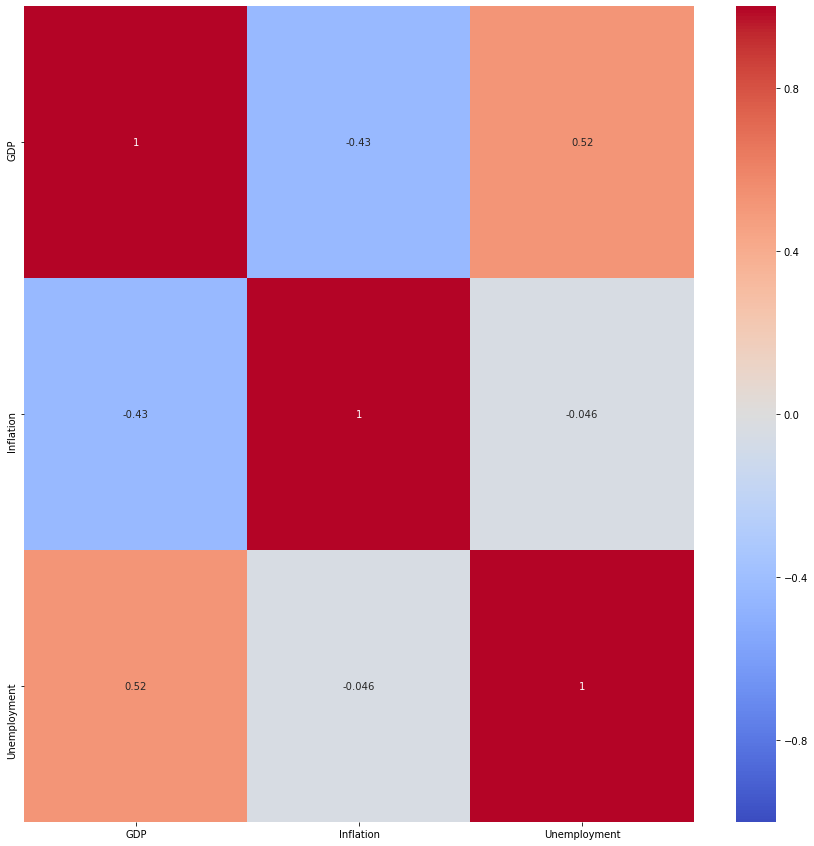

In [149]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.concat([GDP1.set_index('end_date'), INF1.set_index('end_date'), EMP1.set_index('end_date')],
                  axis=1, join='inner').sort_values(by=['end_date']).corr(), 
            annot = True, xticklabels=["GDP","Inflation","Unemployment"] , yticklabels=["GDP","Inflation","Unemployment"],
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')